In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [0]:
df = pd.read_csv('/data_bov.CSV', index_col='Data')

In [3]:
df.head()

,Return,Return_Petr4,Return_BTC,Return_Shift
Data,,,,
1/4/2017,-0.363995,5.729877,2.424544,3.733911
1/5/2017,0.782607,0.000000,6.936433,-0.363995
1/6/2017,-0.654090,1.612903,-9.946016,0.782607
1/9/2017,0.056758,-0.571429,-10.563490,-0.654090
1/10/2017,0.700162,-2.107280,0.462537,0.056758


In [4]:
mlr = LinearRegression()
mlr.fit(df[['Return_Petr4','Return_BTC','Return_Shift']], df['Return'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print(mlr.intercept_)
print(mlr.coef_)

0.09044973264832262
[-0.11314549 -0.01149975  0.09306114]


In [6]:
df['alvo'] = df.apply(lambda df: mlr.intercept_ + (df['Return_Petr4'] * mlr.coef_[0]) + (df['Return_BTC']  * mlr.coef_[1]) + (df['Return_Shift']  * mlr.coef_[2]), axis=1)
df

,Return,Return_Petr4,Return_BTC,Return_Shift,alvo
Data,,,,,
1/4/2017,-0.363995,5.729877,2.424544,3.733911,-0.238260
1/5/2017,0.782607,0.000000,6.936433,-0.363995,-0.023191
1/6/2017,-0.654090,1.612903,-9.946016,0.782607,0.095164
1/9/2017,0.056758,-0.571429,-10.563490,-0.654090,0.215711
1/10/2017,0.700162,-2.107280,0.462537,0.056758,0.328842
...,...,...,...,...,...
12/18/2017,0.698270,-0.399734,22.413792,0.247139,-0.099076
12/19/2017,-0.594953,1.806020,-4.918026,0.698270,0.007645
12/20/2017,0.945239,-0.525624,3.389825,-0.594953,0.055573


In [0]:
df['acerto'] = df.apply(lambda df: df['alvo'] > 0 and df['Return'] > 0 or df['alvo'] < 0 and df['Return'] < 0, axis=1)

In [8]:
df.head(20)

,Return,Return_Petr4,Return_BTC,Return_Shift,alvo,acerto
Data,,,,,,
1/4/2017,-0.363995,5.729877,2.424544,3.733911,-0.238260,True
1/5/2017,0.782607,0.000000,6.936433,-0.363995,-0.023191,False
1/6/2017,-0.654090,1.612903,-9.946016,0.782607,0.095164,False
1/9/2017,0.056758,-0.571429,-10.563490,-0.654090,0.215711,True
1/10/2017,0.700162,-2.107280,0.462537,0.056758,0.328842,True
1/11/2017,0.505376,0.978474,0.780230,0.700162,0.035925,True
1/12/2017,2.414886,1.162791,-13.825516,0.505376,0.164906,True
1/13/2017,-0.472214,1.532567,3.540599,2.414886,0.101063,False
1/16/2017,0.281217,-1.383648,2.116202,-0.472214,0.178723,True


In [0]:
df['resultado'] = df.apply(lambda df: abs(df['Return']) if df['acerto'] else abs(df['Return']) * -1, axis=1)

In [10]:
df

,Return,Return_Petr4,Return_BTC,Return_Shift,alvo,acerto,resultado
Data,,,,,,,
1/4/2017,-0.363995,5.729877,2.424544,3.733911,-0.238260,True,0.363995
1/5/2017,0.782607,0.000000,6.936433,-0.363995,-0.023191,False,-0.782607
1/6/2017,-0.654090,1.612903,-9.946016,0.782607,0.095164,False,-0.654090
1/9/2017,0.056758,-0.571429,-10.563490,-0.654090,0.215711,True,0.056758
1/10/2017,0.700162,-2.107280,0.462537,0.056758,0.328842,True,0.700162
...,...,...,...,...,...,...,...
12/18/2017,0.698270,-0.399734,22.413792,0.247139,-0.099076,False,-0.698270
12/19/2017,-0.594953,1.806020,-4.918026,0.698270,0.007645,False,-0.594953
12/20/2017,0.945239,-0.525624,3.389825,-0.594953,0.055573,True,0.945239


In [11]:
df['soma_acumulada'] = df['resultado'].cumsum()
df

,Return,Return_Petr4,Return_BTC,Return_Shift,alvo,acerto,resultado,soma_acumulada
Data,,,,,,,,
1/4/2017,-0.363995,5.729877,2.424544,3.733911,-0.238260,True,0.363995,0.363995
1/5/2017,0.782607,0.000000,6.936433,-0.363995,-0.023191,False,-0.782607,-0.418612
1/6/2017,-0.654090,1.612903,-9.946016,0.782607,0.095164,False,-0.654090,-1.072702
1/9/2017,0.056758,-0.571429,-10.563490,-0.654090,0.215711,True,0.056758,-1.015943
1/10/2017,0.700162,-2.107280,0.462537,0.056758,0.328842,True,0.700162,-0.315781
...,...,...,...,...,...,...,...,...
12/18/2017,0.698270,-0.399734,22.413792,0.247139,-0.099076,False,-0.698270,22.789470
12/19/2017,-0.594953,1.806020,-4.918026,0.698270,0.007645,False,-0.594953,22.194516
12/20/2017,0.945239,-0.525624,3.389825,-0.594953,0.055573,True,0.945239,23.139756


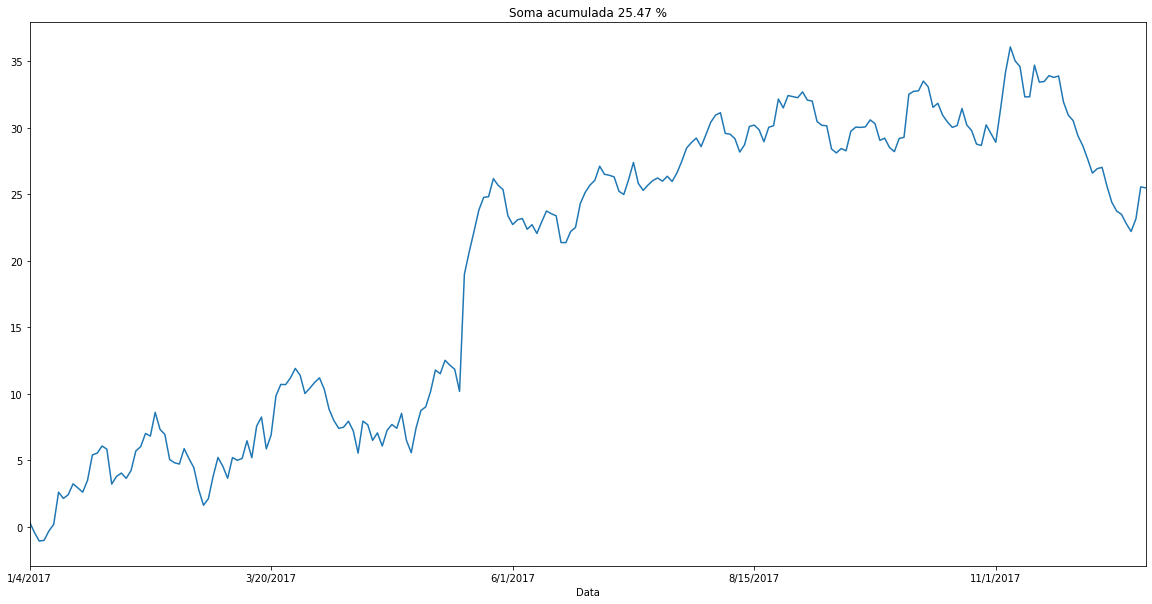

In [17]:
df["soma_acumulada"].plot(figsize=(20, 10), title=f'Soma acumulada {df["soma_acumulada"].values[-1]:.2f} %')